In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import seaborn as sns
from numpy import median

In [56]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report
import scipy as scpy

In [78]:
from sklearn.tree import DecisionTreeClassifier

In [2]:
house_sales_df = pd.read_csv("house_sales.csv",encoding='utf-8')

In [3]:
house_sales_df.isnull().sum()

id                  0
date                0
price               0
bedrooms         1134
bathrooms        1068
sqft_living      1110
sqft_lot         1044
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

# Step 0 - Fill in the missing values for sqft_living

In [4]:
sqft_living_total = house_sales_df['sqft_above'] + house_sales_df['sqft_basement']
house_sales_df['sqft_living'] = house_sales_df['sqft_living'].fillna(sqft_living_total, axis=0)

In [5]:
house_sales_df.isnull().sum()

id                  0
date                0
price               0
bedrooms         1134
bathrooms        1068
sqft_living         0
sqft_lot         1044
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

# Step 1

## Find the best combinations of predictor variables to use in the regression model 

- The variables that have the best correlation indexes to predict ```bedrooms``` are ```bathrooms``` and ```sqft_living```
- The variables that have the best correlation indexes to predict ```bathrooms``` are ```bedrooms``` and ```sqft_living```
- The scatter plot below shows the relationship between these three variabels, with ```bedrooms``` as the dependent variable and ```bathrooms``` and ```sqft_living``` as the independent/preditor variables.

In [6]:
sns.set(font_scale=2)
sns.lmplot(x="sqft_living",  y="bedrooms", hue="bathrooms", data=house_sales_df, legend=False, height=20, aspect=20/30,ci=None)

In [7]:
sns.pairplot(house_sales_df, vars=['sqft_living', 'bedrooms', 'bathrooms'], height=10, diag_kind='kde', kind='reg')

## Calculating the missing values for bedrooms

- Change Nan values to zero.
- Use a regression model with ```bathrooms``` and ```sqft_living``` as predictor variables to calculate the ```bedrooms``` , the dependent variable.
- ```bathrooms``` and ```bedrooms``` can be interchanged as the dependent variable, with ```sqft_living``` always used as one of the predictor variables.

In [8]:
house_sales_df[house_sales_df['bedrooms'].isnull()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
18,16000397,20141205T000000,189000.0,NaN,1.00,1200.0,9850.0,1.0,0,0,...,7,1200,0,1921,0,98002,47.3089,-122.210,1060,5095
23,8091400200,20140516T000000,252700.0,NaN,1.50,1070.0,NaN,1.0,0,0,...,7,1070,0,1985,0,98030,47.3533,-122.166,1220,8386
31,2426039314,20141201T000000,280000.0,NaN,1.50,1190.0,1265.0,3.0,0,0,...,7,1190,0,2005,0,98133,47.7274,-122.357,1390,1756
32,461000390,20140624T000000,687500.0,NaN,1.75,2330.0,5000.0,1.5,0,0,...,7,1510,820,1929,0,98117,47.6823,-122.368,1460,5000
46,8945200830,20150325T000000,210490.0,NaN,1.00,990.0,8528.0,1.0,0,0,...,6,990,0,1966,0,98023,47.3066,-122.371,1228,8840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21498,1972200555,20140714T000000,610000.0,NaN,1.75,1630.0,1500.0,3.0,0,0,...,8,1630,0,2014,0,98103,47.6536,-122.354,1570,1335
21505,9468200109,20140617T000000,1555000.0,NaN,3.50,4360.0,6240.0,2.0,0,3,...,10,2960,1400,2008,0,98103,47.6791,-122.354,1920,3910
21523,3304300300,20150507T000000,579950.0,NaN,2.75,2460.0,8643.0,2.0,0,0,...,9,2460,0,2011,0,98059,47.4828,-122.133,3110,8626
21565,5007500120,20150226T000000,341780.0,NaN,2.75,2260.0,NaN,2.0,0,0,...,7,2260,0,2014,0,98001,47.3507,-122.291,2260,4563


In [9]:
house_sales_df['bedrooms'] = house_sales_df['bedrooms'].fillna(0)

In [10]:
house_sales_df[house_sales_df['bedrooms'].isnull()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [11]:
y = house_sales_df.bedrooms
X = house_sales_df[['bathrooms','sqft_living']]
X = sm.add_constant(X)
lr_model = sm.OLS(y, X, missing='drop').fit()

In [12]:
house_sales_df['predict_bedrooms'] = round(lr_model.predict(X),0)

In [13]:
house_sales_df['bedrooms'] = house_sales_df['bedrooms'].fillna(house_sales_df['predict_bedrooms'], axis=0)

In [14]:
house_sales_df[house_sales_df['bedrooms'].isnull()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,predict_bedrooms


## Calculating the missing values for bathrooms
- Change Nan values to zero.
- Use a regression model with ```bedrooms``` and ```sqft_living``` as predictor variables to calculate the ```bathrooms```, the dependent variable.

In [15]:
house_sales_df[house_sales_df['bathrooms'].isnull()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,predict_bedrooms
24,3814700200,20141120T000000,329000.0,3.0,NaN,2450.0,6500.0,2.0,0,0,...,2450,0,1985,0,98030,47.3739,-122.172,2200,6865,NaN
26,1794500383,20140626T000000,937000.0,3.0,NaN,2450.0,2691.0,2.0,0,0,...,1750,700,1915,0,98119,47.6386,-122.360,1760,3573,NaN
105,1328310370,20150402T000000,375000.0,3.0,NaN,2340.0,10005.0,1.0,0,0,...,1460,880,1978,0,98058,47.4431,-122.133,2250,8162,NaN
139,2767603505,20140507T000000,519950.0,3.0,NaN,1170.0,1249.0,3.0,0,0,...,1170,0,2014,0,98107,47.6722,-122.381,1350,1310,NaN
167,1836980160,20150324T000000,807100.0,4.0,NaN,2680.0,4499.0,2.0,0,0,...,2680,0,1999,0,98006,47.5650,-122.125,2920,4500,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21441,9544700730,20140515T000000,914500.0,4.0,NaN,3950.0,10856.0,3.0,0,0,...,3950,0,2013,0,98075,47.5818,-121.996,3200,10856,NaN
21480,567000775,20140912T000000,449000.0,2.0,NaN,1460.0,1296.0,2.0,0,0,...,1160,300,2008,0,98144,47.5923,-122.296,1460,1296,NaN
21490,9512200090,20150501T000000,529000.0,3.0,NaN,2340.0,7724.0,1.0,0,0,...,2340,0,2010,0,98058,47.4593,-122.134,3040,5787,NaN
21566,3528900770,20150423T000000,710200.0,4.0,NaN,1670.0,2642.0,2.0,0,0,...,1350,320,2008,0,98109,47.6397,-122.345,1670,2594,NaN


In [16]:
house_sales_df['bathrooms'] = house_sales_df['bathrooms'].fillna(0)

In [17]:
y = house_sales_df.bathrooms
X = house_sales_df[['bedrooms','sqft_living']]
X = sm.add_constant(X)
lr_model = sm.OLS(y, X, missing='drop').fit()

In [18]:
house_sales_df['predict_bathrooms'] = round(lr_model.predict(X),1)

In [19]:
house_sales_df.loc[(house_sales_df.predict_bathrooms - np.fix(house_sales_df.predict_bathrooms)) != 0.5 , 'predict_bathrooms'] = round(house_sales_df.predict_bathrooms,0)

In [21]:
house_sales_df['bathrooms'] = house_sales_df['bathrooms'].fillna(house_sales_df['predict_bathrooms'], axis=0)

In [23]:
house_sales_df[house_sales_df['bathrooms'].isnull()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,predict_bedrooms,predict_bathrooms


## Save the data to a CSV file

In [24]:
house_sales_df.to_csv(r'house_sales_s1_mayel.csv', index=False, header=True)

# Step 2

## Focusing on the three variables with the highes correlations in relationship to pricing

- Review the correlation table with ```bathrooms```, ```sqft_living``` and ```grade``` in relationship to ```price``` 

In [25]:
corr = house_sales_df[['price','bathrooms','sqft_living','grade']].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,price,bathrooms,sqft_living,grade
price,1.00,0.44,0.70,0.67
bathrooms,0.44,1.00,0.63,0.55
sqft_living,0.70,0.63,1.00,0.76
grade,0.67,0.55,0.76,1.00


## The relationship between bathroom and price

- The bar plot below shows how the trend in the number of baths is to increase, closely following the increase in the price. 

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

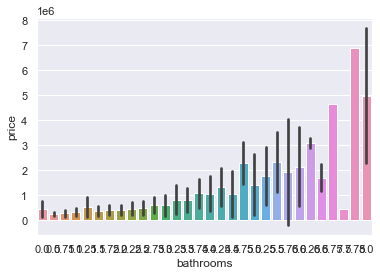

In [32]:
sns.set(font_scale=1)
sns.barplot(x="bathrooms",y="price",data=house_sales_df, estimator=median, ci="sd")

### Two dimensional (bivariate) density plot
- The chart bellow demostrates how there are three density clusters arround one half, one and two bathrooms.

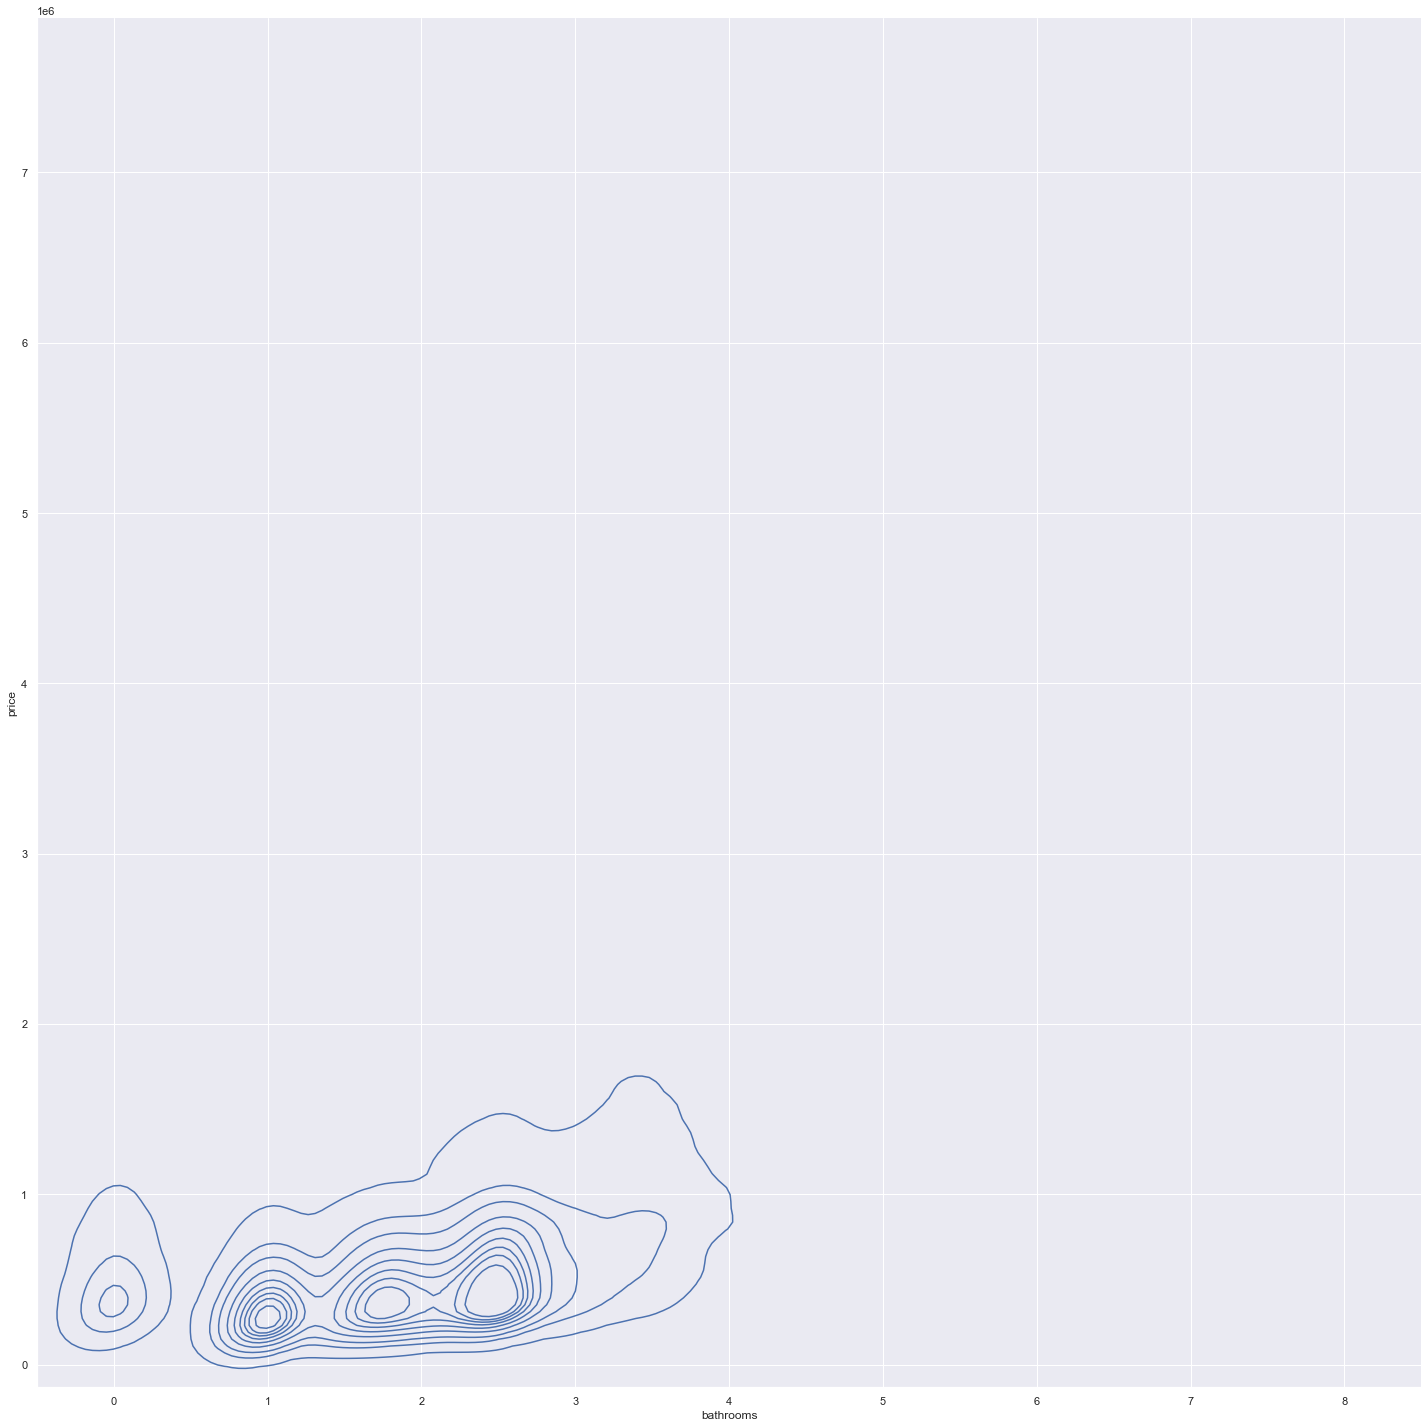

In [36]:
sns.set(font_scale=1)
sns.displot(house_sales_df, x="bathrooms", y="price", kind="kde", height=20)

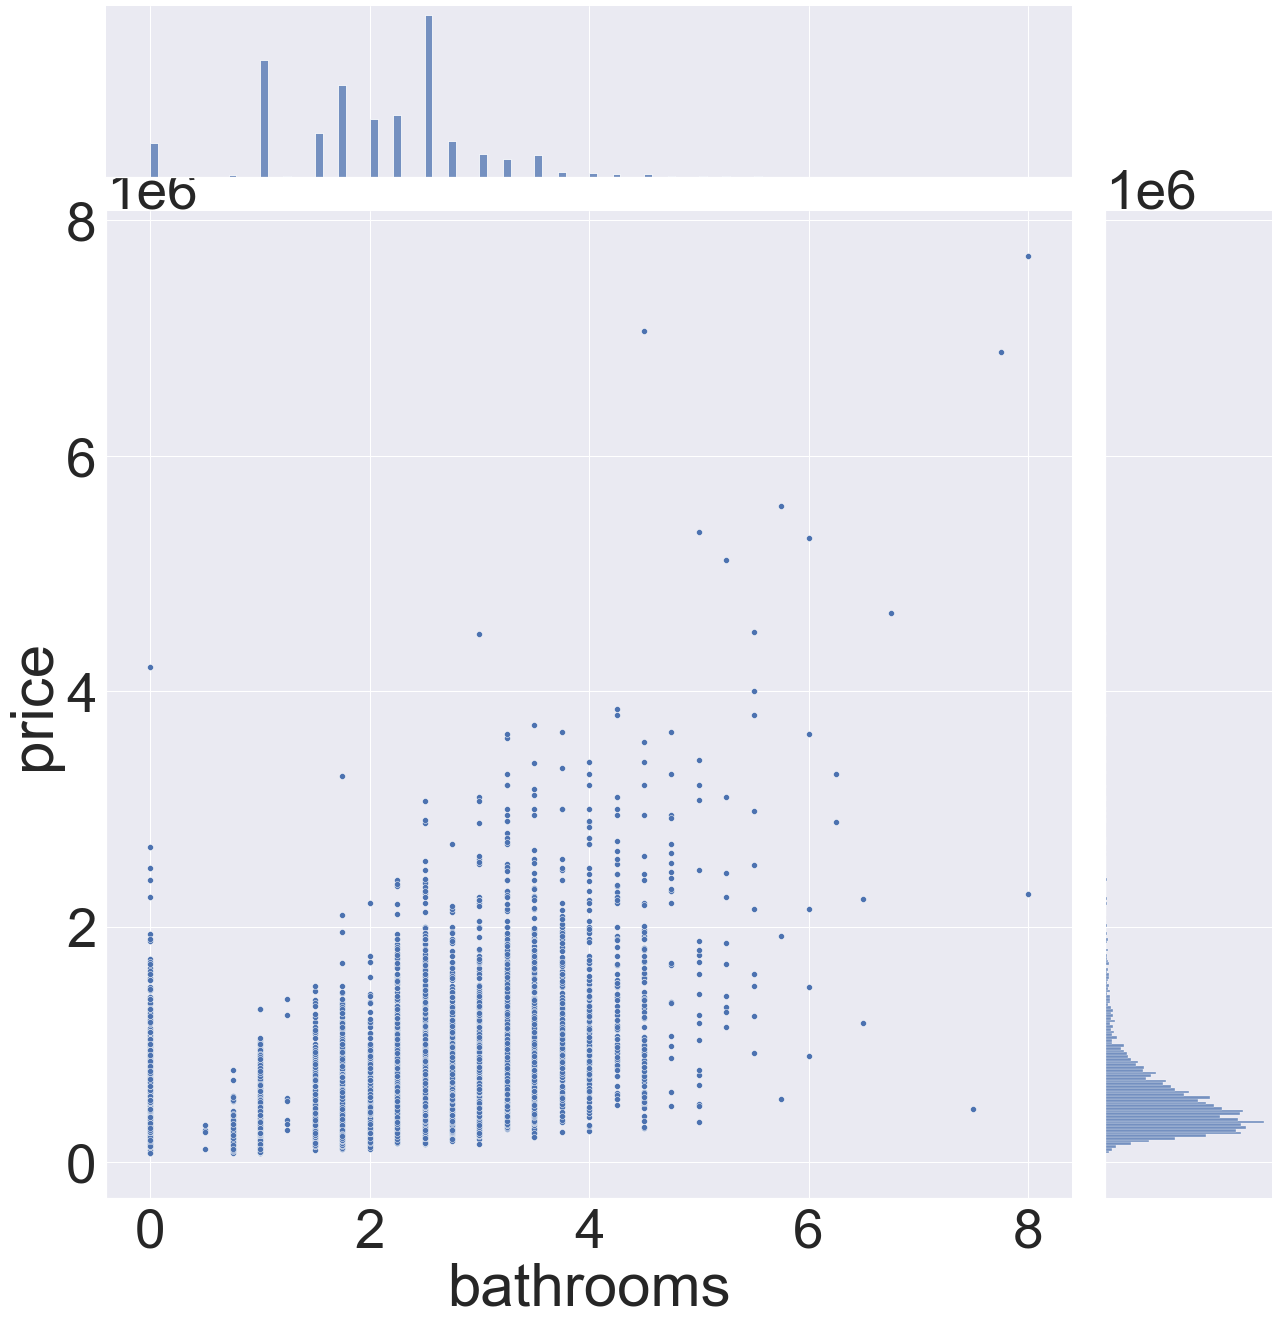

In [37]:
sns.set(font_scale=5)
sns.jointplot(data=house_sales_df, x="bathrooms", y="price", height=20)

### Regression plot

- This plot shows the best fitting regression line cutting across the scatter plot of observations.
- This plot also shows the 95% confidence interval arround the regression line.

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

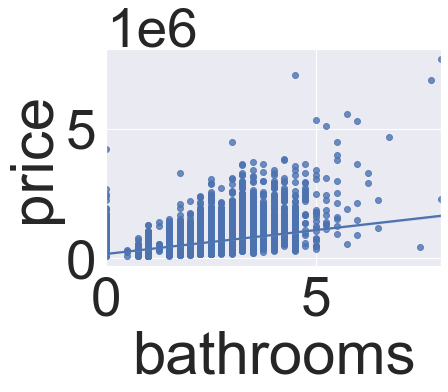

In [38]:
sns.set(font_scale=5)
sns.regplot(x="bathrooms", y="price", data=house_sales_df)

### KDE Pair plots

The plots bellow show us the relationships in denstity distributions.

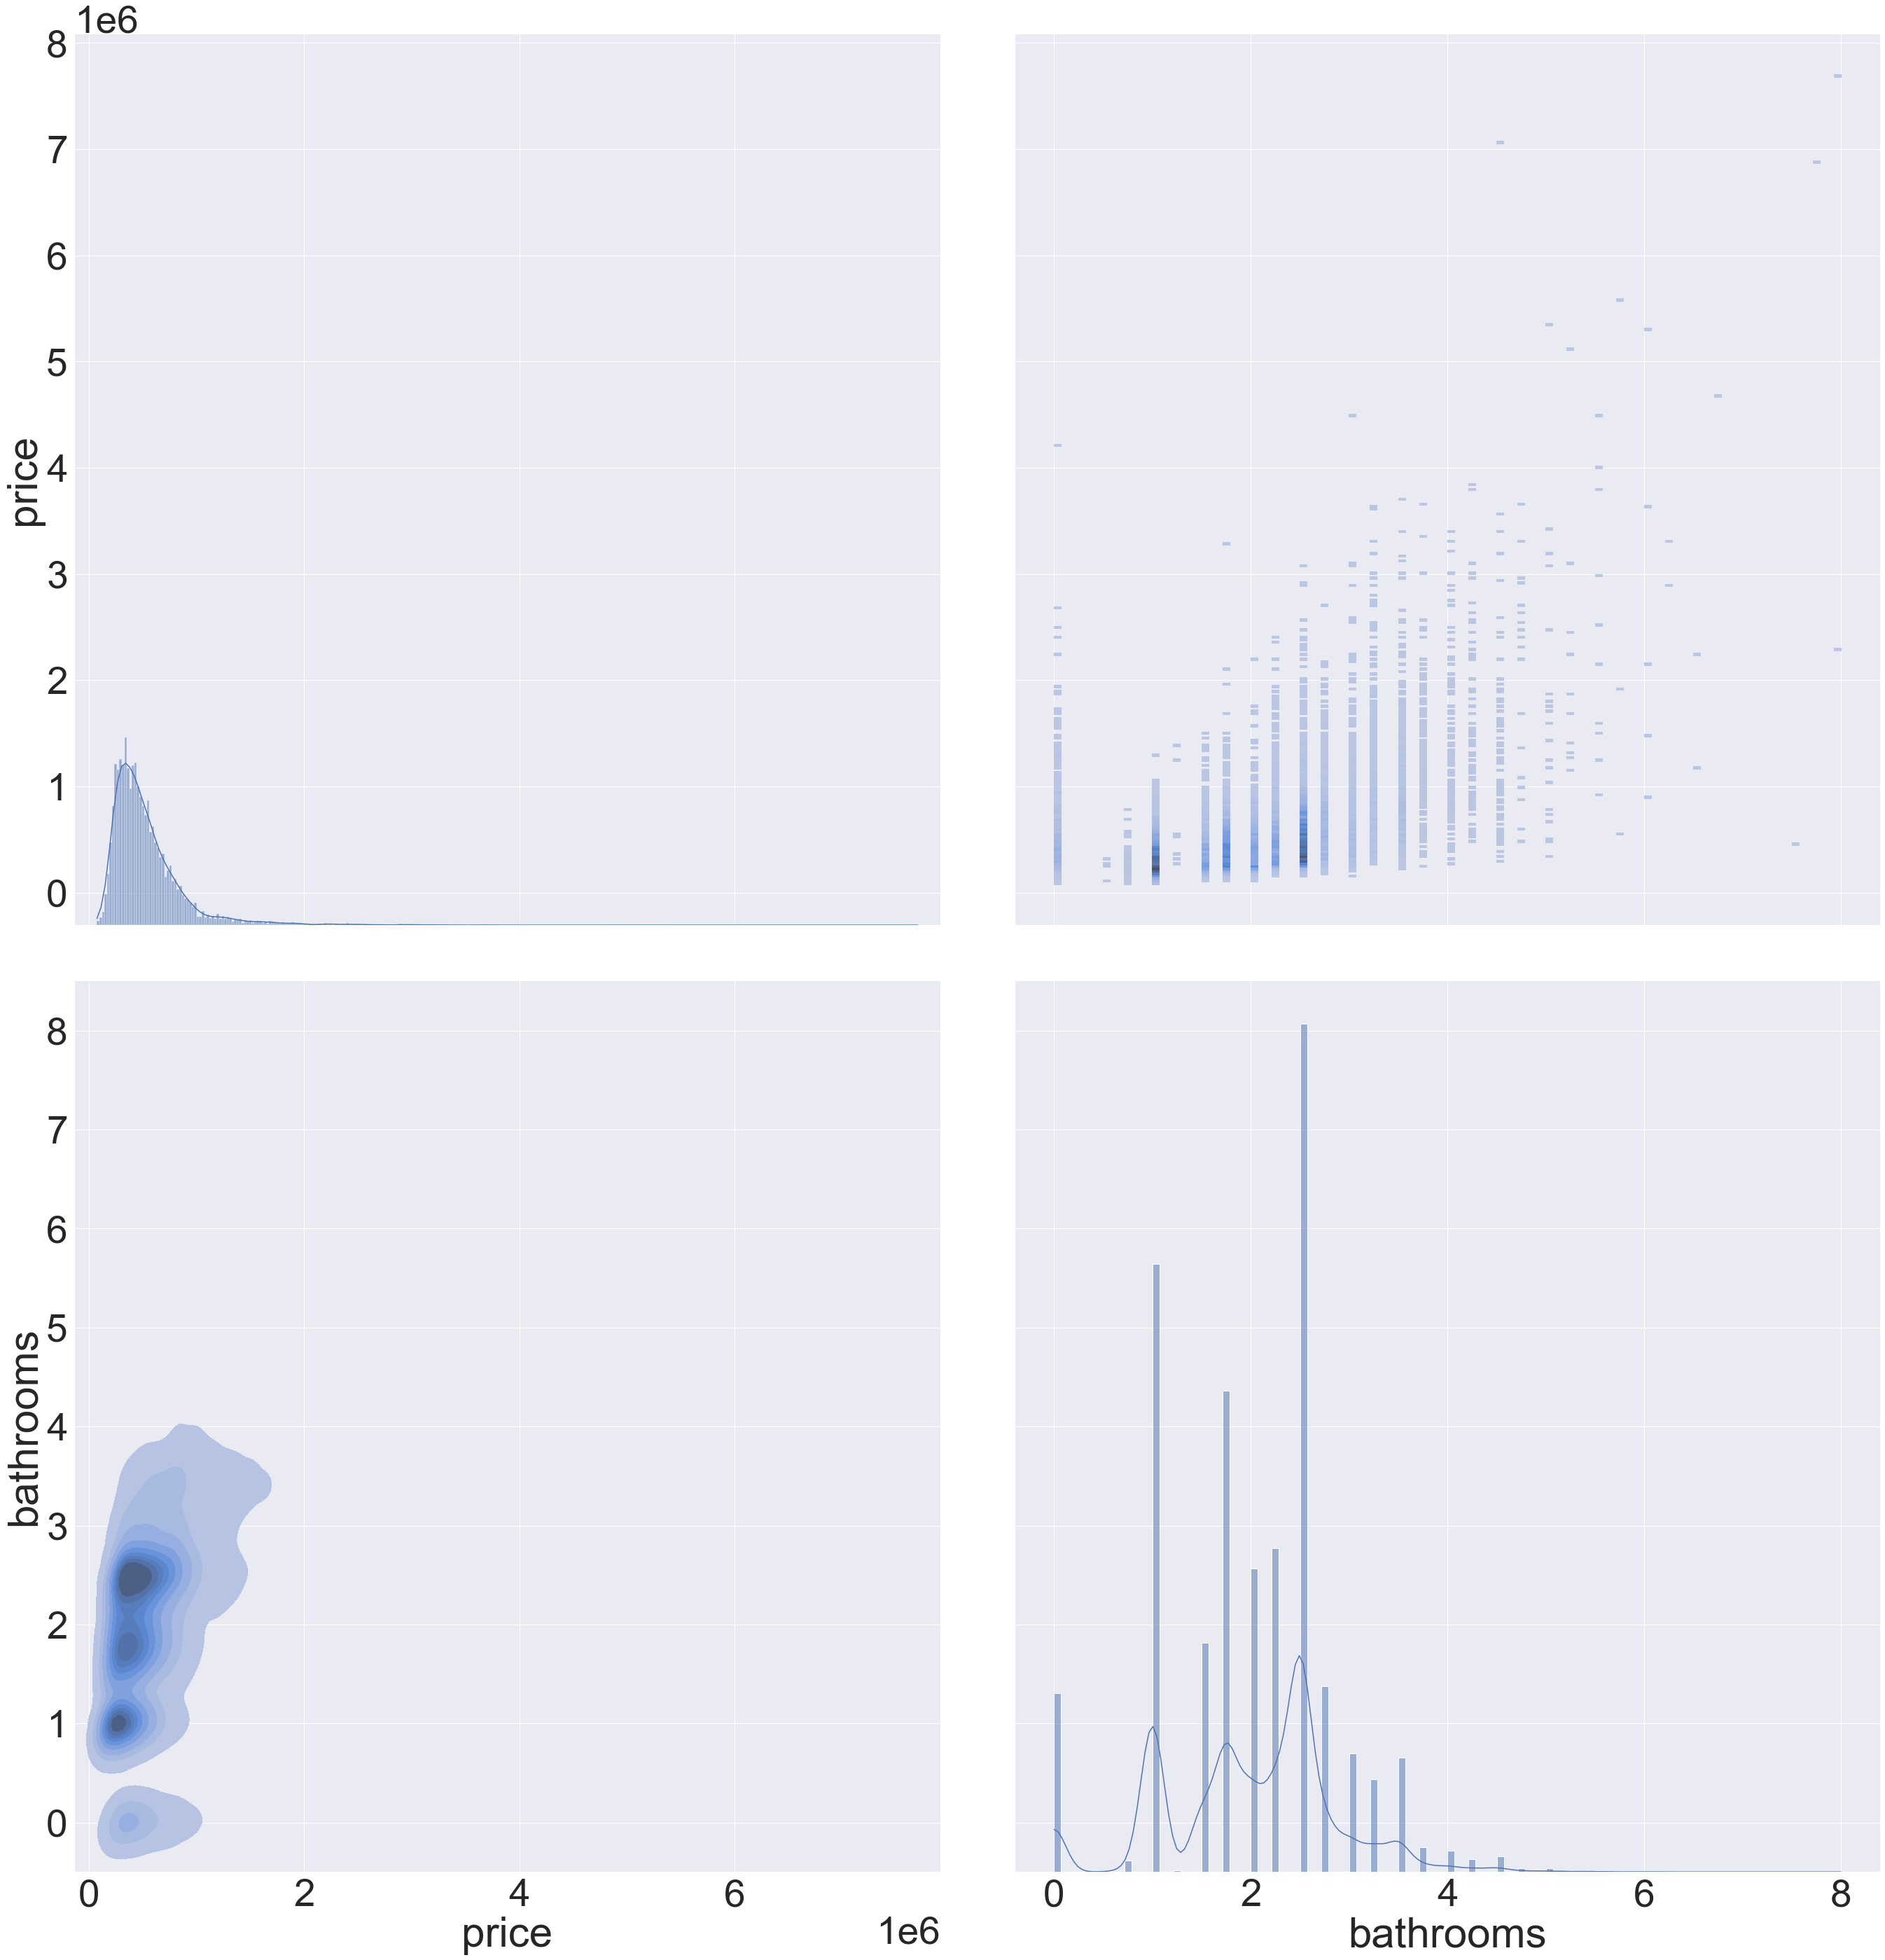

In [39]:
g = sns.PairGrid(house_sales_df[['price','bathrooms']],height=20)
sns.set(font_scale=5)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot,fill=True)
g.map_diag(sns.histplot, kde=True)

# Desicion Tree Regressor

## Separate the data in to a Train and Test datasets

In [41]:
train_df, test_df = train_test_split(house_sales_df, test_size=0.5, random_state=42, shuffle=True)

## Create and train  (fit) the model

In [42]:
regressor = DecisionTreeRegressor(max_depth=2)

In [43]:
regressor.fit(train_df[['bathrooms','grade','sqft_living']], train_df['price'])

DecisionTreeRegressor(max_depth=2)

In [44]:
y_predict = regressor.predict(test_df[['bathrooms','grade','sqft_living']])

In [45]:
y_test=train_df['price']

## Plot the tree

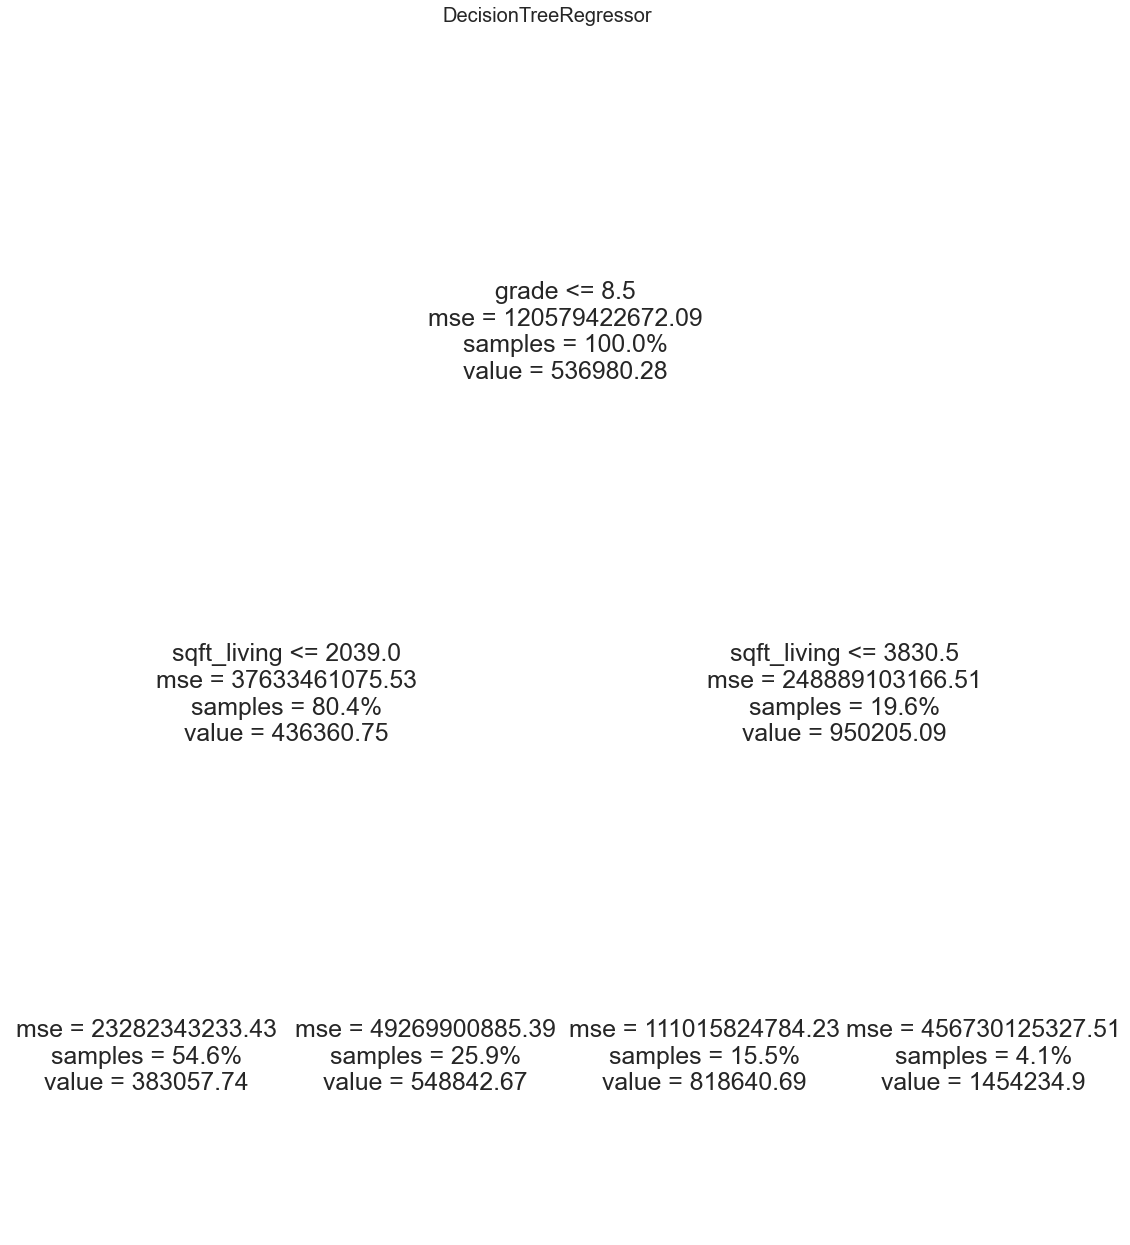

In [53]:
plt.figure(figsize=(20,20)).suptitle("DecisionTreeRegressor", fontsize=20)
tp=tree.plot_tree(regressor, proportion=True,feature_names=['bathrooms', 'grade', 'sqft_living'], precision=2)

## Metrics related to accuracy and feature importance of the model

### Feature importance

In [47]:
regressor.feature_importances_

array([0.        , 0.70014938, 0.29985062])

### cross validated metrics
Measures the accuracy of the model by separating the sample in to similar size sub-sumples, tests and then give the score for the last sub-sample.

In [65]:
scores = cross_val_score(regressor,test_df[['bathrooms','grade','sqft_living']], test_df['price'],cv=5 )
np.round(scores,3)

array([0.402, 0.497, 0.373, 0.445, 0.426])

### Mean square error function
This is the standard deviation of the residuals (errors). The lower the better.

In [66]:
print("Mean squared error                : ",np.round(mean_squared_error(y_test, y_predict[:-1]),2))
print("Square root of Mean Squared Error : ",np.round(np.sqrt(mean_squared_error(y_test, y_predict[:-1])),2))
print("Mean absolute error               : ",np.round(mean_absolute_error(y_test, y_predict[:-1]),2))

Mean squared error                :  183288753835.46
Square root of Mean Squared Error :  428122.36
Mean absolute error               :  285007.31


### Pearson's correlation
- Correlation coefficient +1 to -1
- P value , 0 to 1

In [57]:
np.round(scpy.stats.pearsonr(y_test, y_predict[:-1]),4)

array([-0.0056,  0.5577])

### Accuracy report

In [67]:
scores = cross_val_score(regressor,train_df[['bathrooms','grade','sqft_living']], train_df['price'],cv=5 )

In [68]:
print("Accuracy: %0.2f +/- %0.2f" % (scores.mean(),scores.std()*2))

Accuracy: 0.49 +/- 0.03


## Plot the predicted values visavis the actual values

In [69]:
y_train = train_df['price']

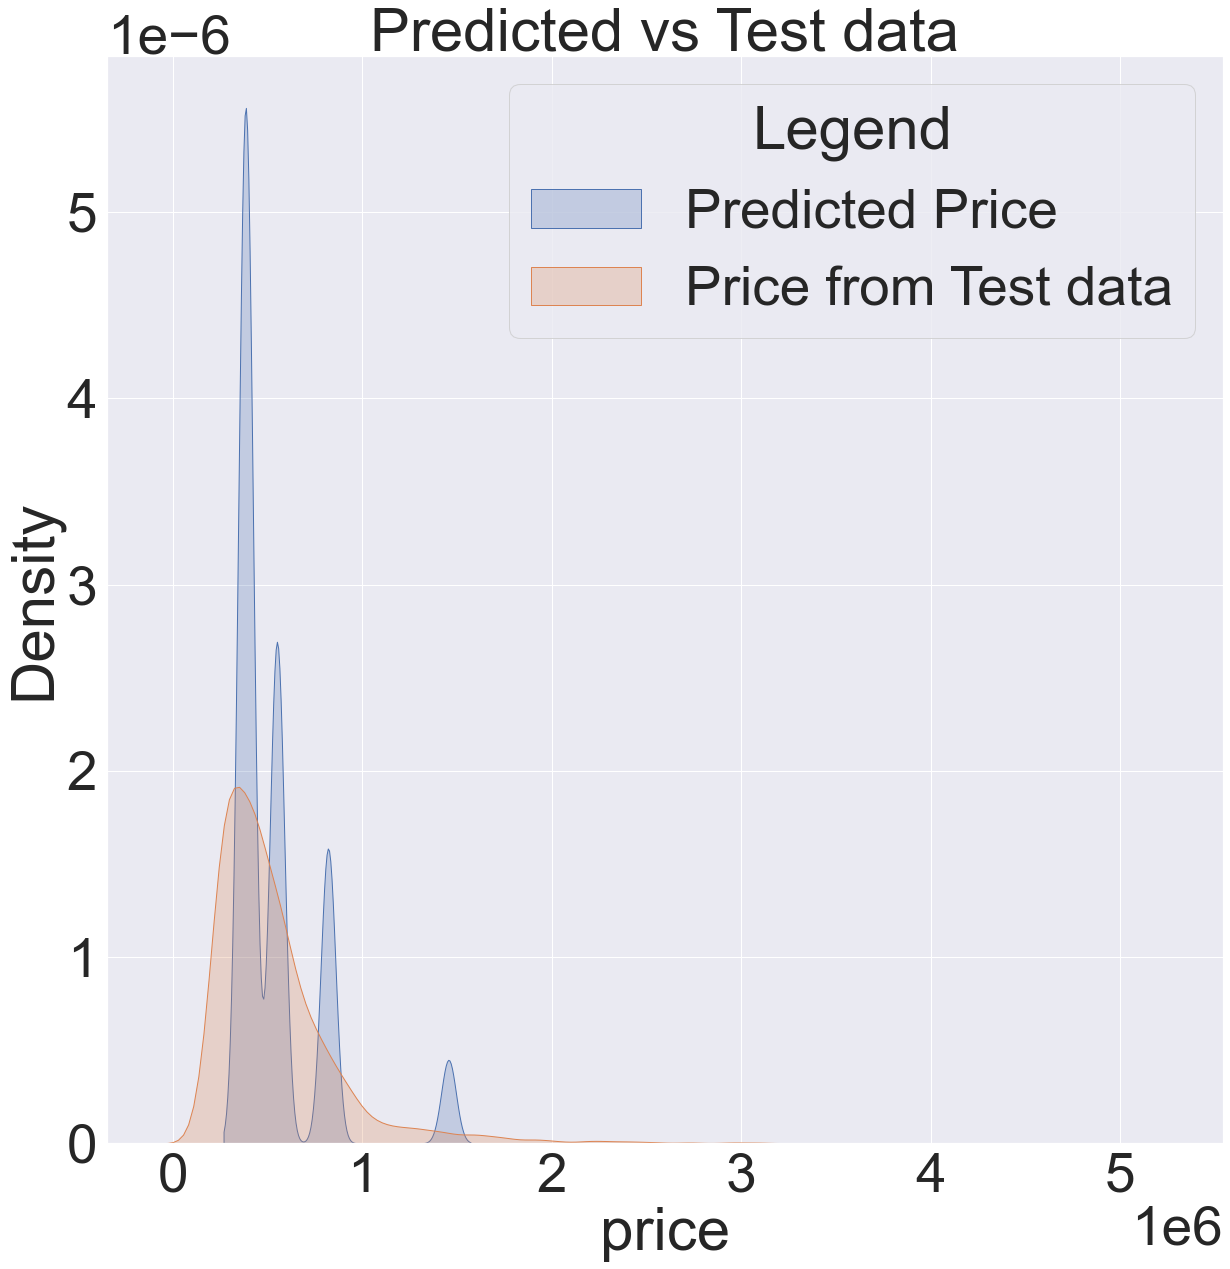

In [72]:
fig, ax = plt.subplots(figsize=(20,20))
ax.set_title("Predicted vs Test data")
sns.kdeplot(y_predict, ax=ax, fill = True)
sns.kdeplot(y_test, ax=ax, fill = True)
ax.legend(["Predicted Price", "Price from Test data"],title="Legend")

### Predicted visavis Train price values

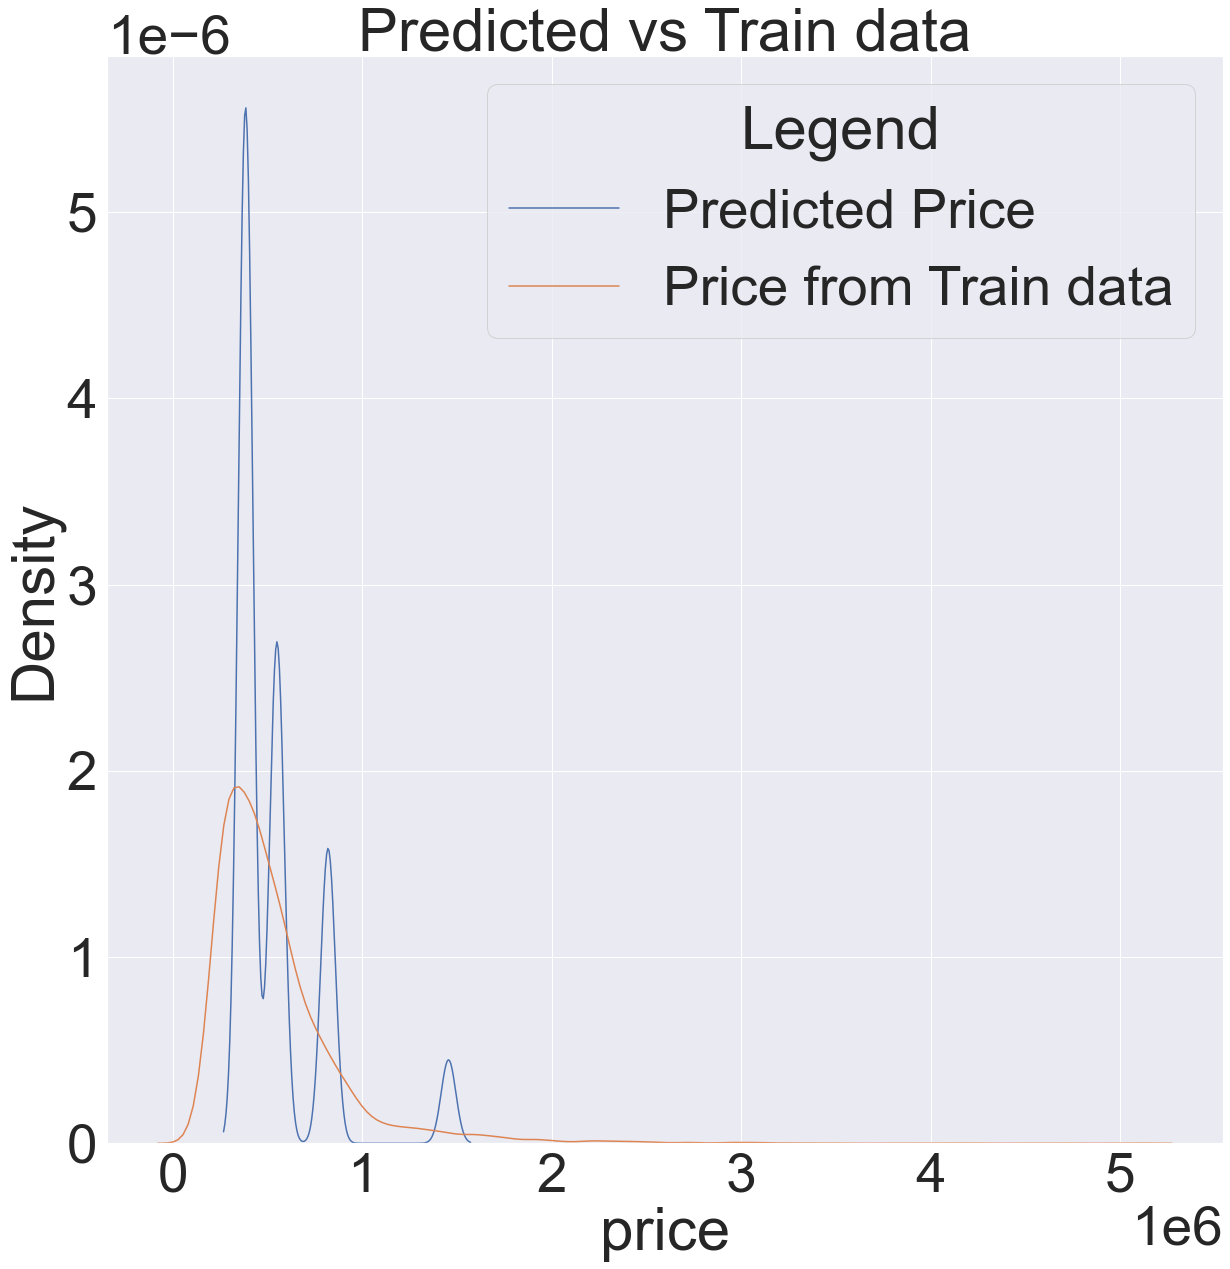

In [73]:
fig, ax = plt.subplots(figsize=(20,20))
ax.set_title("Predicted vs Train data")
sns.kdeplot(y_predict, ax=ax)
sns.kdeplot(y_train, ax=ax)
ax.legend(["Predicted Price", "Price from Train data"],title="Legend")

# Clasifier random forest

## First we categorize the data
The categories, bins or buckets were selected in accordance to the distrubution of the price data in the box plot. The more values in a given quartile, the more categories with smaller range were selected. 

In [74]:
def clasifier(row):
    if row['price'] <= 75000:
        return "0-75000"
    elif row['price'] > 75000 and row['price'] <= 321950:
        return "75000-321950"
    elif row['price'] > 321950 and row['price'] <= 450000:
        return "321950-450000"
    elif row['price'] > 450000 and row['price'] <= 645000:
        return "450000-645000"
    elif row['price'] > 645000 and row['price'] <= 750000:
        return "645000-750000"
    elif row['price'] > 750000 and row['price'] <= 850000:
        return "750000-850000"
    elif row['price'] > 850000 and row['price'] <= 950000:
        return "850000-950000"
    elif row['price'] > 950000 and row['price'] <= 1500000:
        return "950000-1500000"
    elif row['price'] > 1500000 and row['price'] <= 2000000:
        return "1500000-2000000"
    elif row['price'] > 2000000 and row['price'] <= 2500000:
        return "2000000-2500000"
    elif row['price'] > 2500000 and row['price'] <= 3000000:
        return "2500000-3000000"
    elif row['price'] > 3000000 and row['price'] <= 3500000:
        return "3000000-3500000"
    elif row['price'] > 3500000 and row['price'] <= 4000000:
        return "3500000-4000000"
    elif row['price'] > 4000000 and row['price'] <= 4500000:
        return "4000000-4500000"
    elif row['price'] > 4500000 and row['price'] <= 5000000:
        return "4500000-5000000"
    elif row['price'] > 5000000 and row['price'] <= 6000000:
        return "5000000-6000000"
    elif row['price'] > 6000000 and row['price'] <= 7000000:
        return "6000000-7000000"
    elif row['price'] > 7000000 and row['price'] <= 8000000:
        return "7000000-8000000"
    elif row['price'] > 8000000 and row['price'] <= 9000000:
        return "8000000-9000000"
    elif row['price'] > 9000000 and row['price'] <= 10000000:
        return "9000000-10000000"
    else:
        return ">10000000"


In [75]:
def clasifier_int(row):
    if row['price'] <= 75000:
        return 1
    elif row['price'] > 75000 and row['price'] <= 321950:
        return 2
    elif row['price'] > 321950 and row['price'] <= 450000:
        return 3
    elif row['price'] > 450000 and row['price'] <= 645000:
        return 4
    elif row['price'] > 645000 and row['price'] <= 750000:
        return 5
    elif row['price'] > 750000 and row['price'] <= 850000:
        return 6
    elif row['price'] > 850000 and row['price'] <= 950000:
        return 7
    elif row['price'] > 950000 and row['price'] <= 1500000:
        return 8
    elif row['price'] > 1500000 and row['price'] <= 2000000:
        return 9
    elif row['price'] > 2000000 and row['price'] <= 2500000:
        return 10
    elif row['price'] > 2500000 and row['price'] <= 3000000:
        return 11
    elif row['price'] > 3000000 and row['price'] <= 3500000:
        return 12
    elif row['price'] > 3500000 and row['price'] <= 4000000:
        return 13
    elif row['price'] > 4000000 and row['price'] <= 4500000:
        return 14
    elif row['price'] > 4500000 and row['price'] <= 5000000:
        return 15
    elif row['price'] > 5000000 and row['price'] <= 6000000:
        return 16
    elif row['price'] > 6000000 and row['price'] <= 7000000:
        return 17
    elif row['price'] > 7000000 and row['price'] <= 8000000:
        return 18
    elif row['price'] > 8000000 and row['price'] <= 9000000:
        return 19
    elif row['price'] > 9000000 and row['price'] <= 10000000:
        return 20
    else:
        return 21

In [76]:
house_sales_df["price_range_int"] = house_sales_df.apply(clasifier_int, axis=1)

In [77]:
house_sales_df["price_range"] = house_sales_df.apply(clasifier, axis=1)

## Get a sub set of the data for training and another for testing the model

In [80]:
train_df, test_df = train_test_split(house_sales_df, test_size=0.2, random_state=42, shuffle=True)

In [81]:
X = train_df[['bathrooms', 'grade', 'sqft_living']]

In [82]:
Y = train_df['price_range_int']

In [83]:
Xt = test_df[['bathrooms', 'grade', 'sqft_living']]

In [84]:
Yt = test_df['price_range_int']

## Create and train the Decision Tree Classifier

In [85]:
classifierTree = DecisionTreeClassifier()

In [86]:
classifierTree = classifierTree.fit(X, Y)

In [87]:
Yp = classifierTree.predict(Xt)

## Metrics related to accuracy and feature importance of the model

### report

In [88]:
classifierTree.predict_proba(Xt)

array([[0.        , 0.25      , 0.125     , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.21052632, 0.36842105, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.2       , 0.2       , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.18181818, ..., 0.        , 0.        ,
        0.        ]])

### Accuracy report

In [89]:
np.round(accuracy_score(Yt,Yp),3)

0.346

### Cross validations report

In [92]:
scores = cross_val_score(classifierTree, Xt, Yp,cv=5 )
print("Accuracy: %0.2f +/- %0.2f" % (scores.mean(),scores.std()*2))

Accuracy: 0.72 +/- 0.02


/Users/mayelespino/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


## Plot the forest
### Only two levels, easier to read

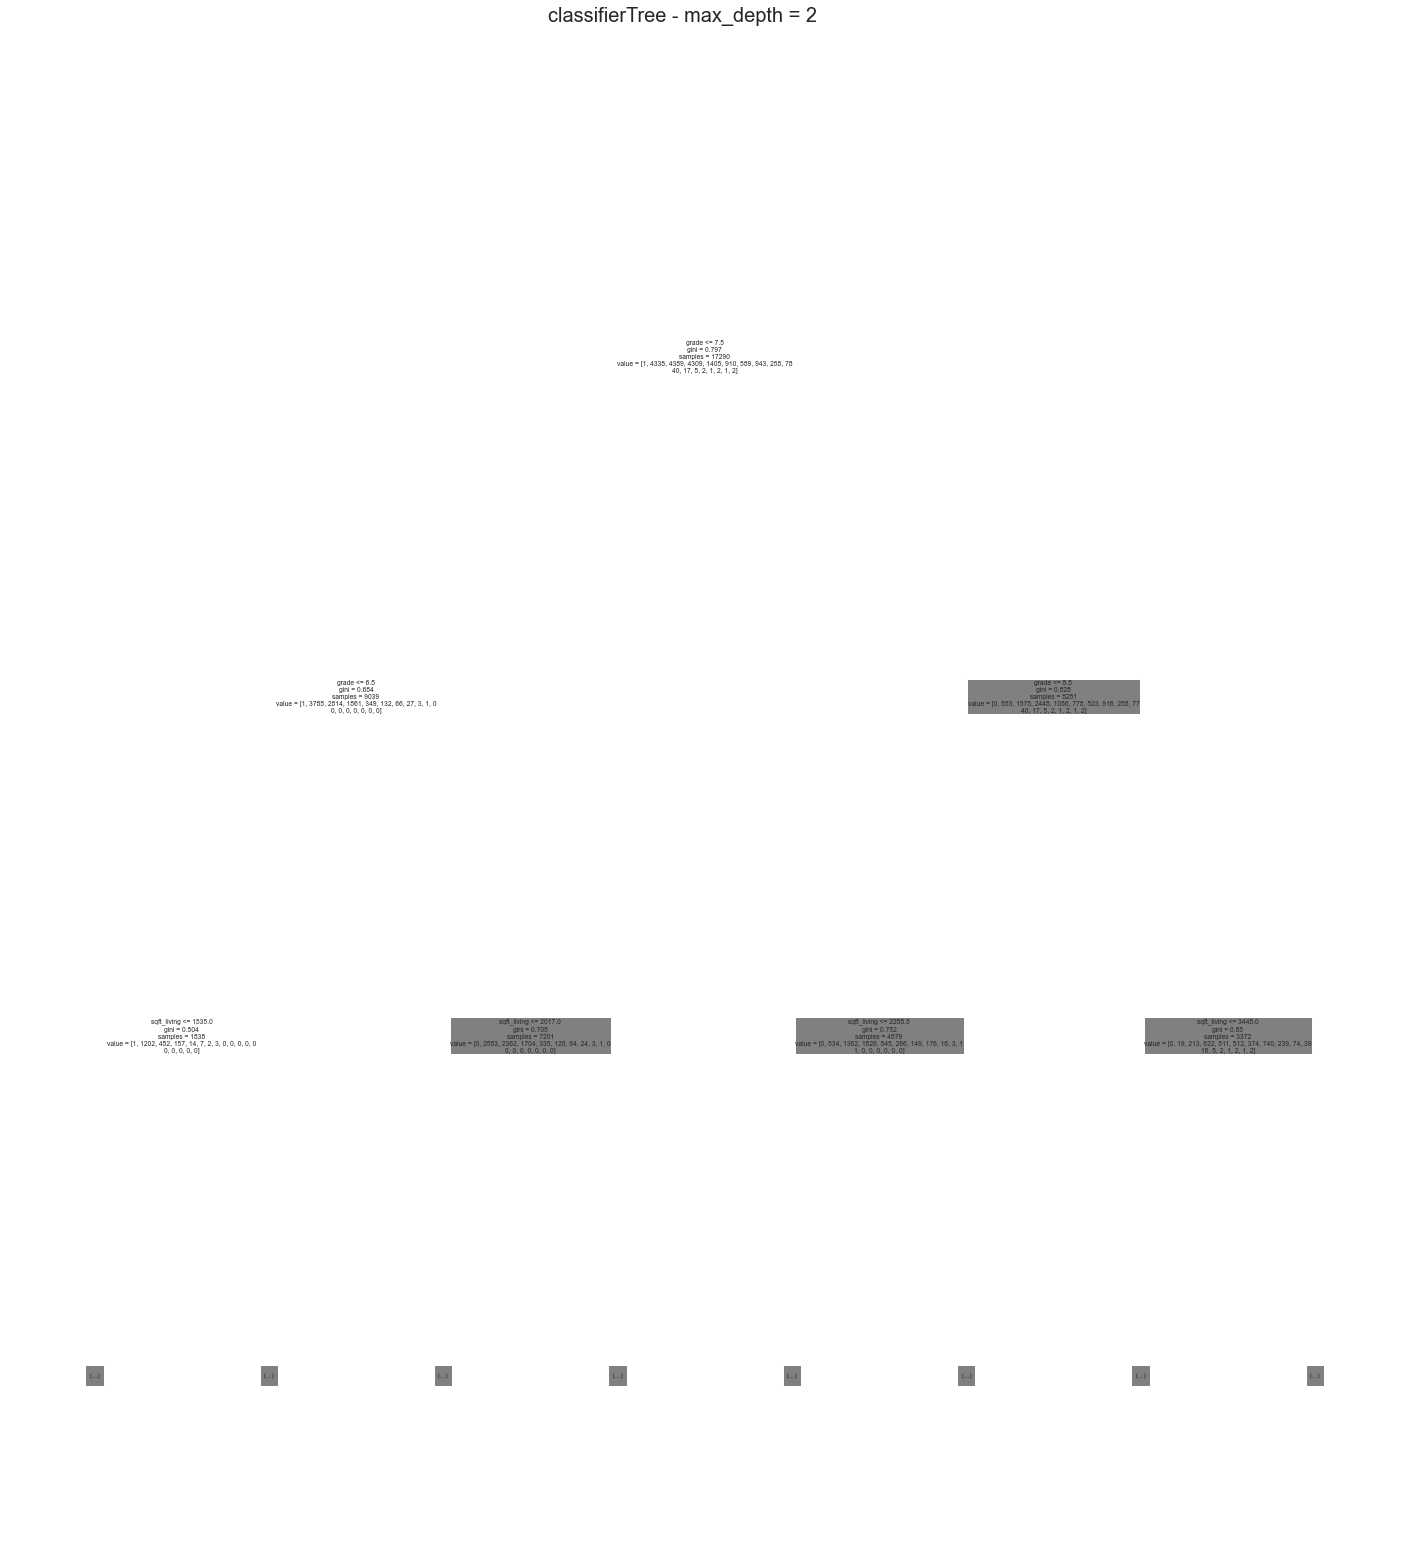

In [93]:
plt.figure(figsize=(25,25)).suptitle("classifierTree - max_depth = 2", fontsize=20)
tplot = tree.plot_tree(classifierTree, feature_names=['bathrooms', 'grade', 'sqft_living'],max_depth=2)

### Now with all the levels, hard to read 

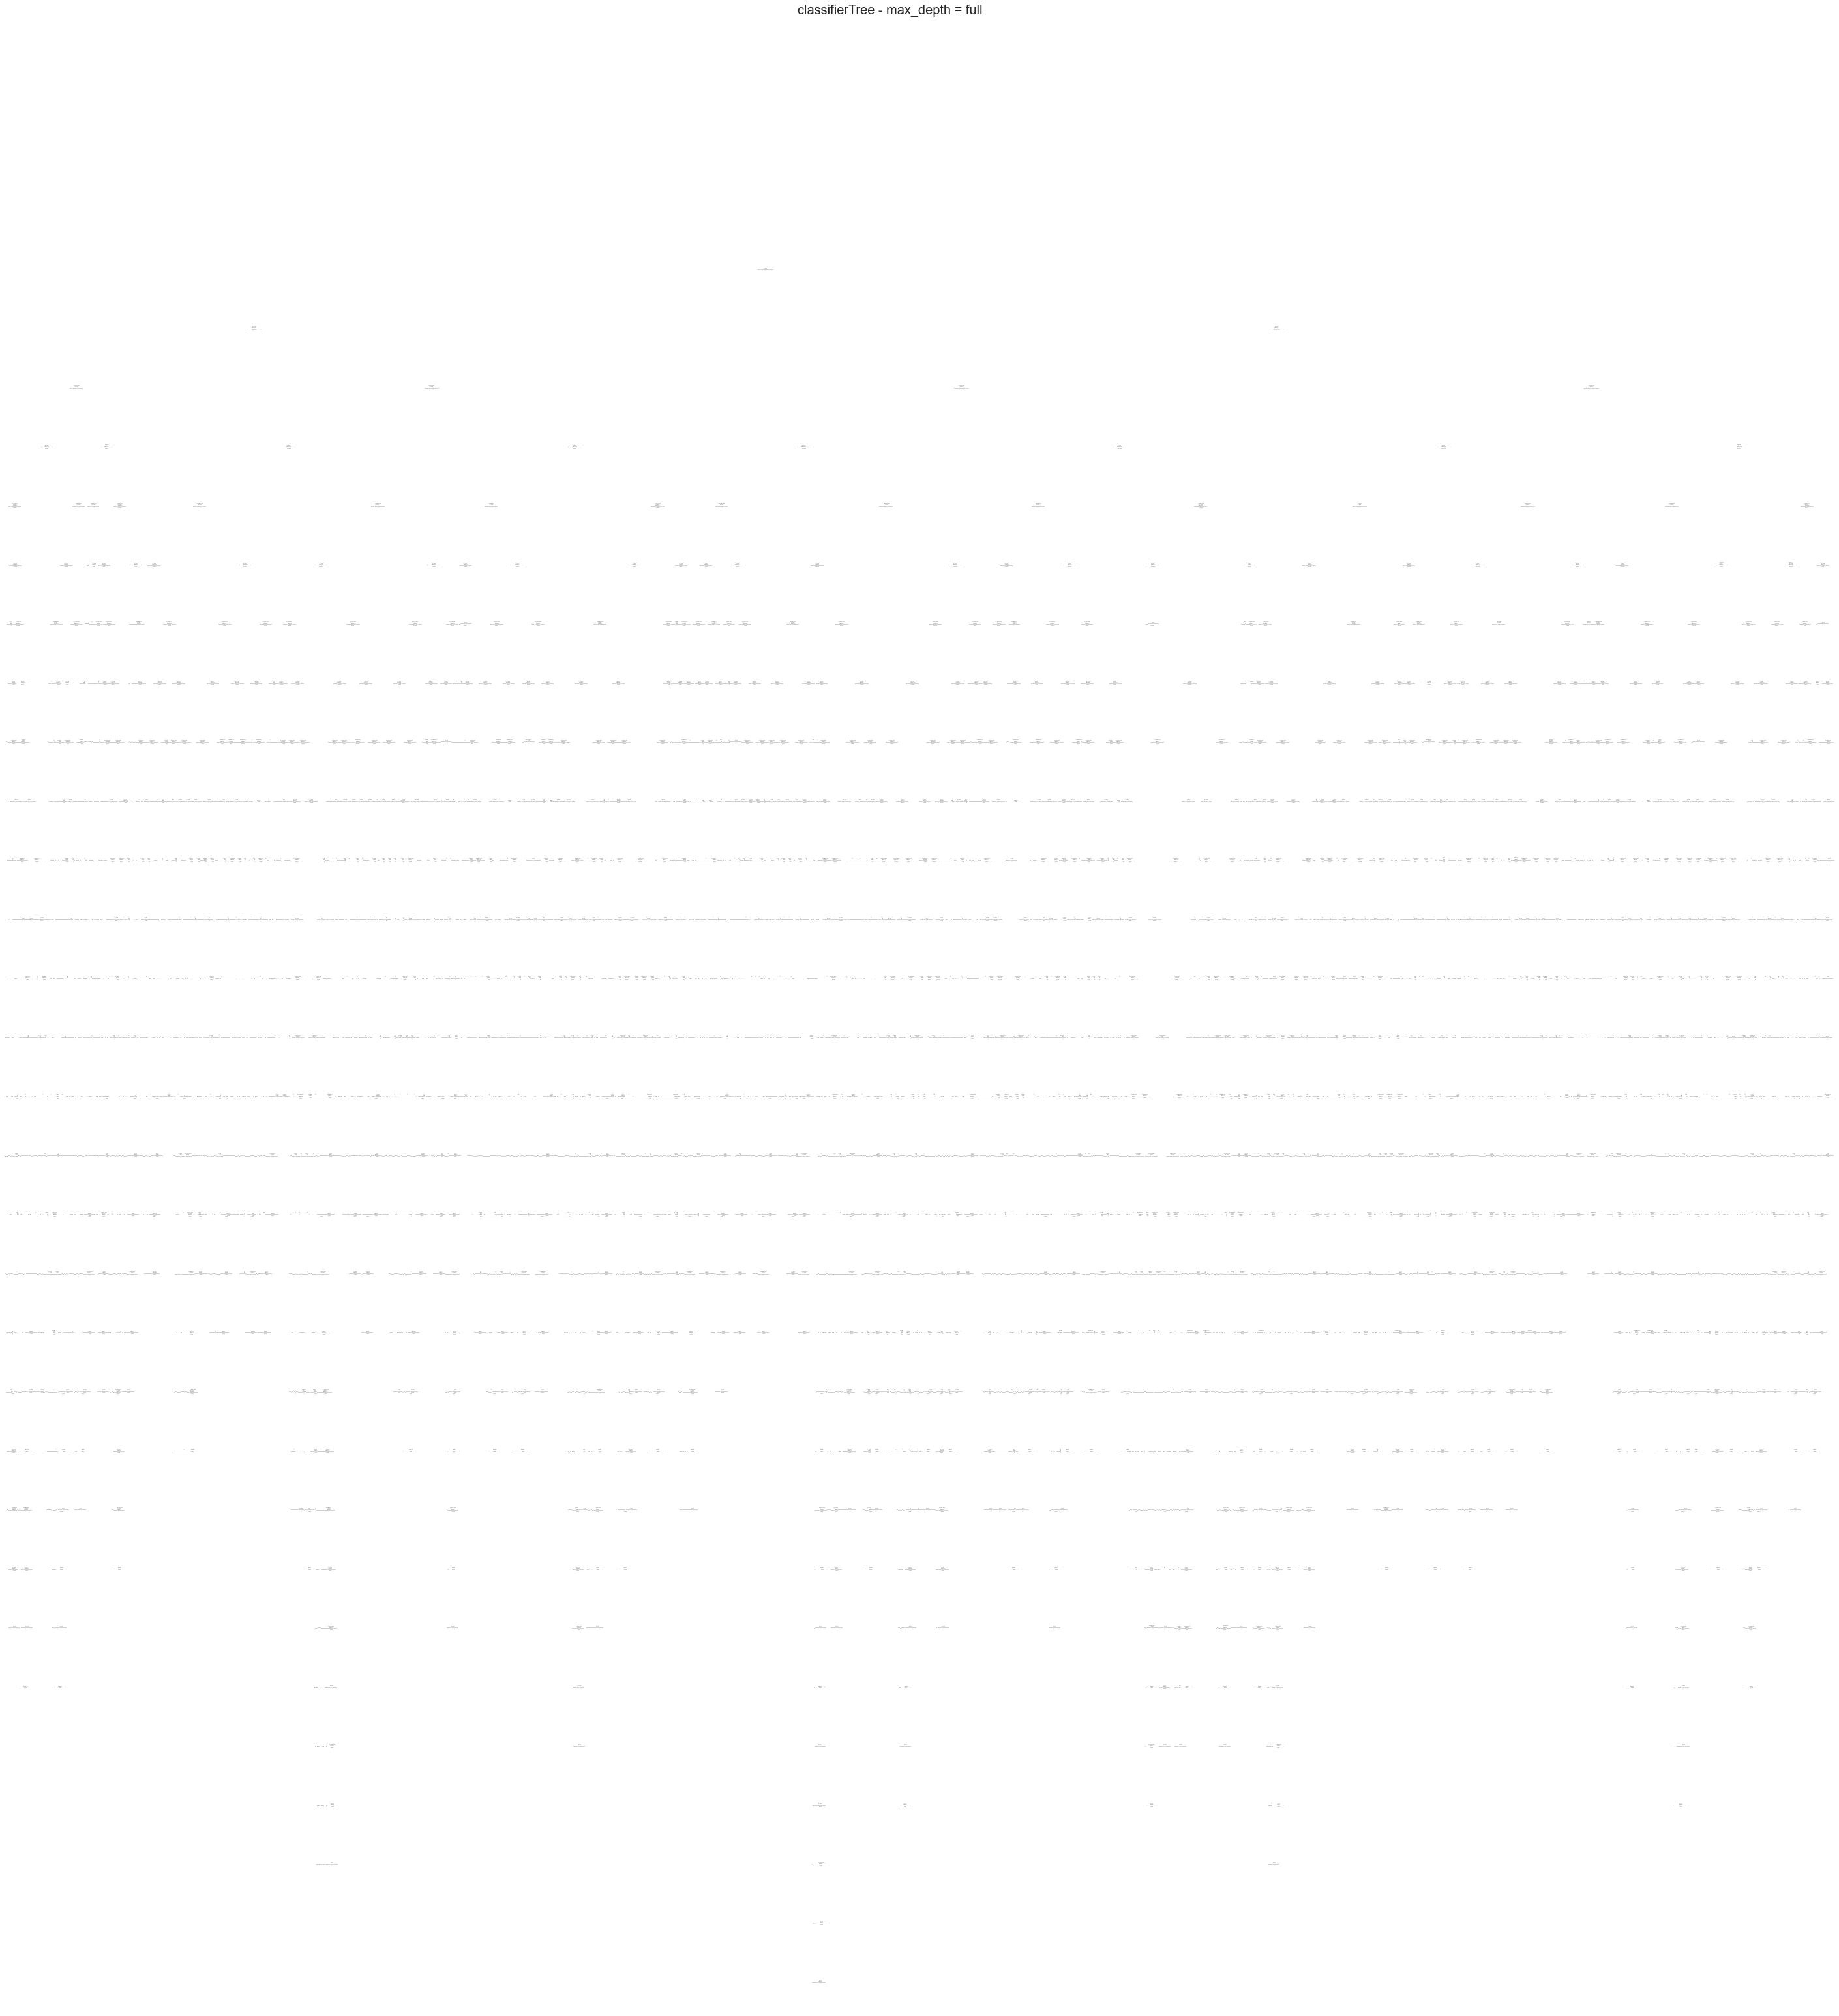

In [94]:
plt.figure(figsize=(50,50)).suptitle("classifierTree - max_depth = full", fontsize=20)
tplot = tree.plot_tree(classifierTree, feature_names=['bathrooms', 'grade', 'sqft_living'])

### Plot the predicted values visavis the actual values

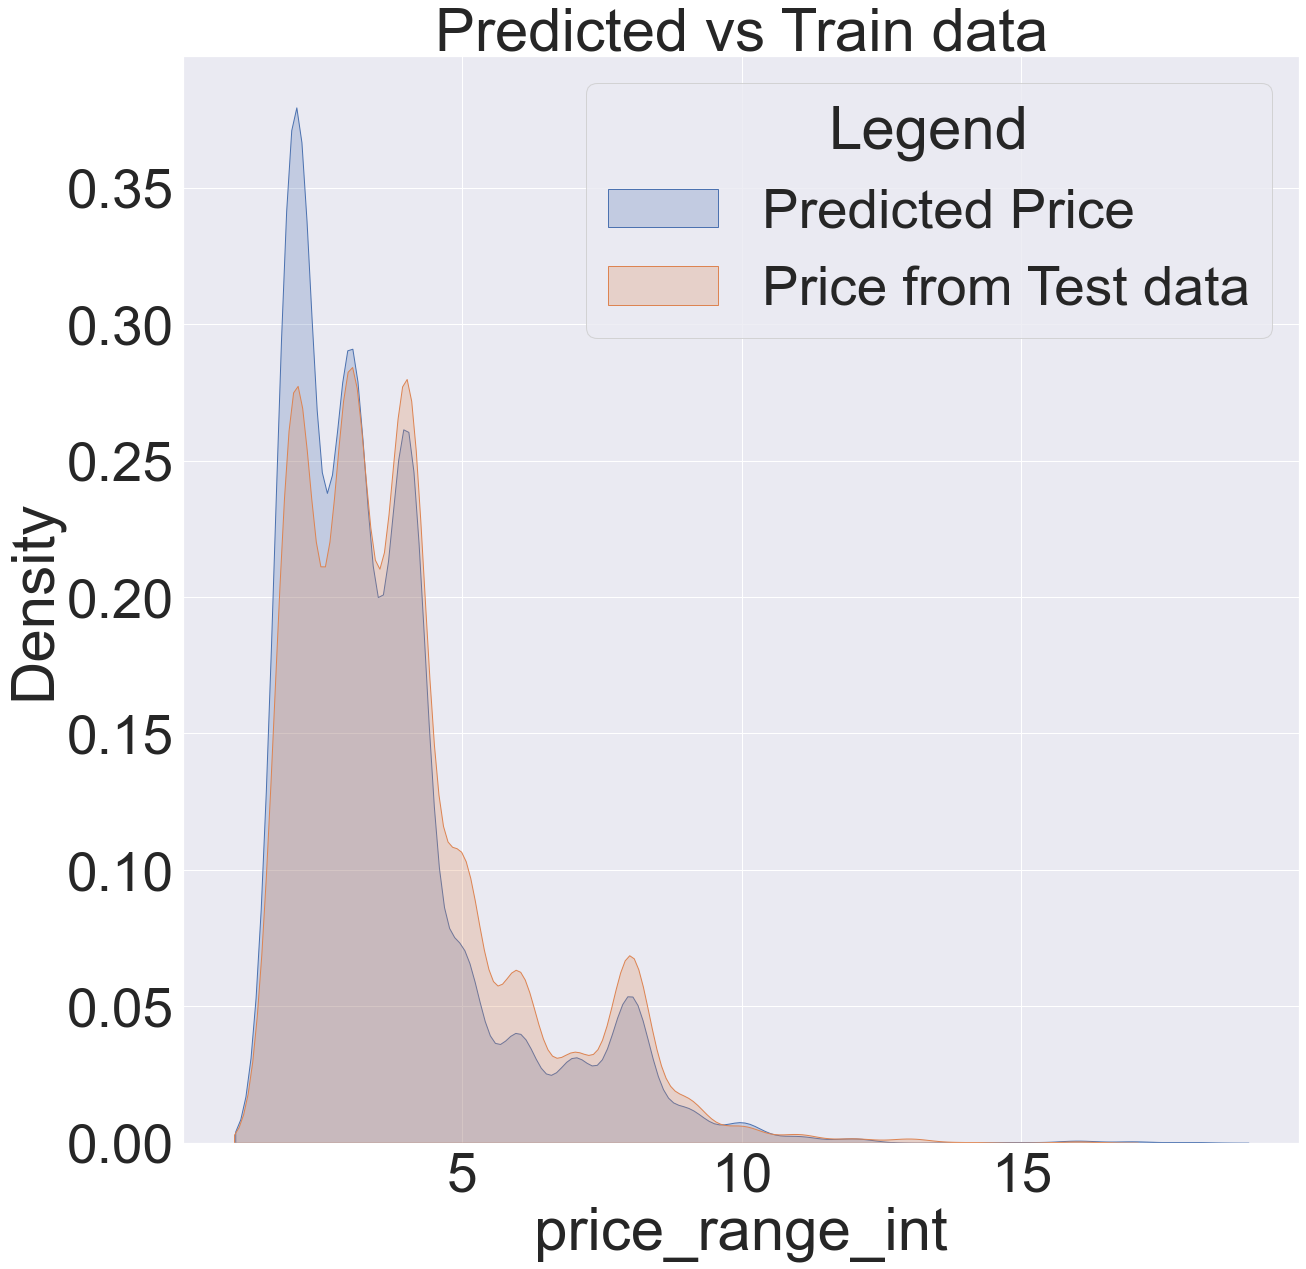

In [98]:
fig, ax = plt.subplots(figsize=(20,20))
ax.set_title("Predicted vs Train data")
sns.kdeplot(Yp, ax=ax, fill = True)
sns.kdeplot(Yt, ax=ax, fill = True)
ax.legend(["Predicted Price", "Price from Test data"],title="Legend")

### Predicted visavis Train price values

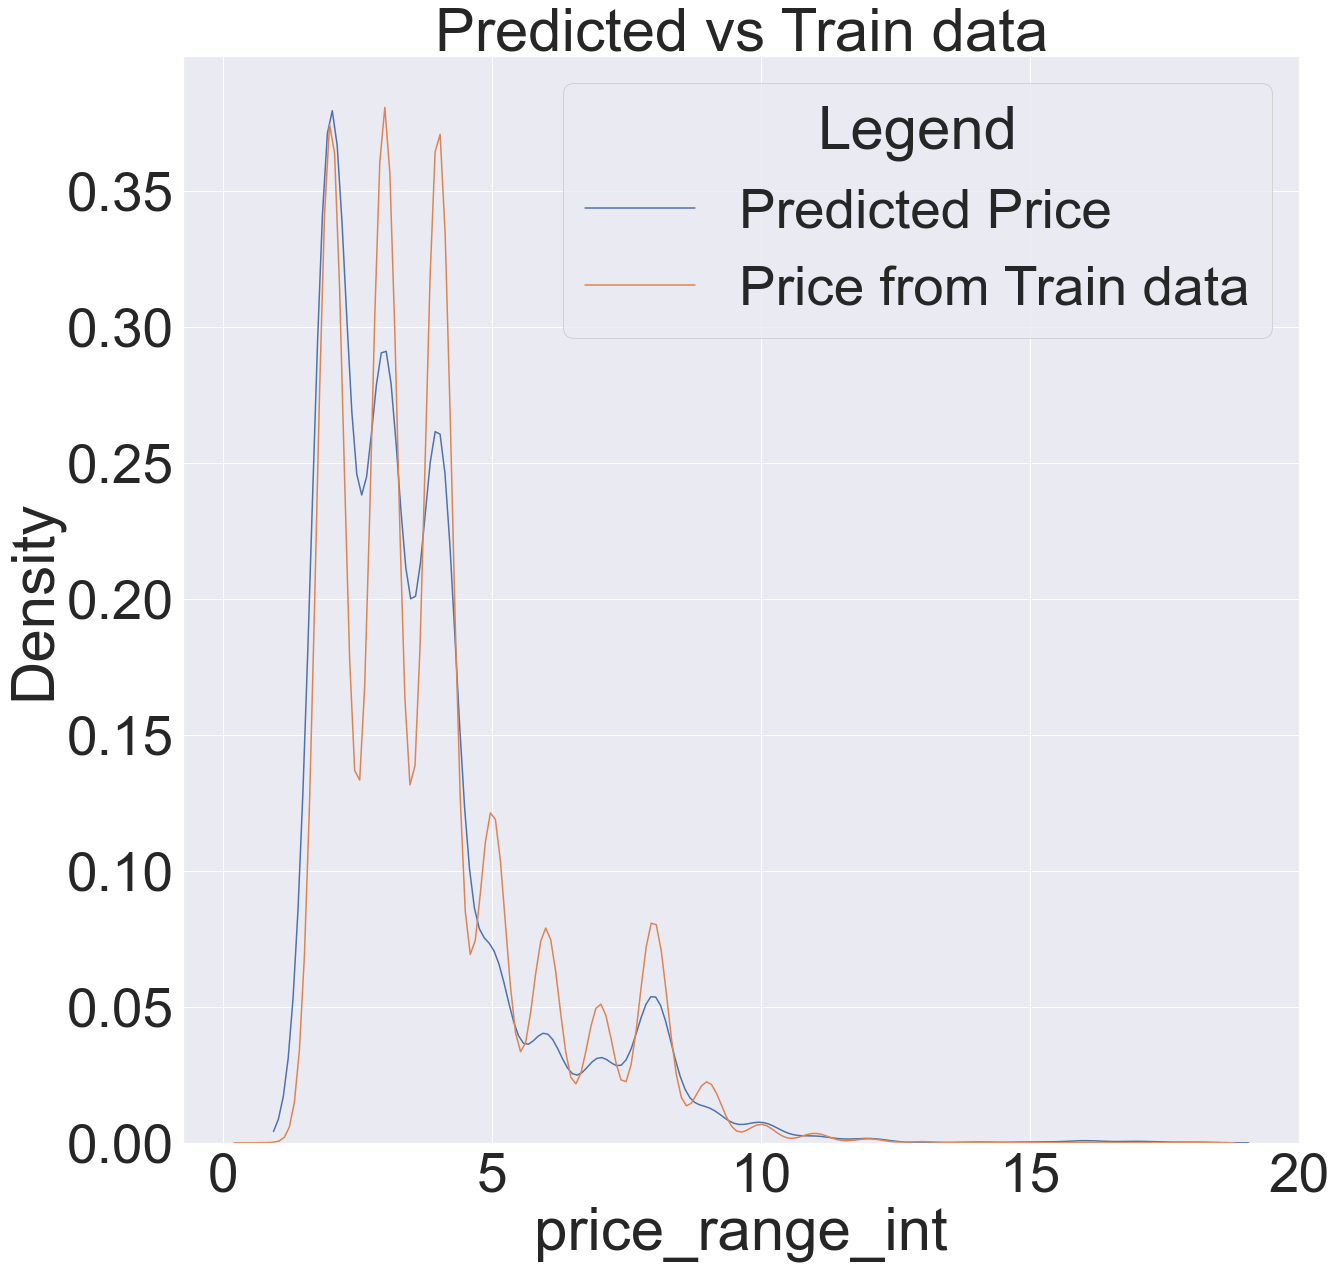

In [97]:
fig, ax = plt.subplots(figsize=(20,20))
ax.set_title("Predicted vs Train data")
sns.kdeplot(Yp, ax=ax)
sns.kdeplot(Y, ax=ax)
ax.legend(["Predicted Price", "Price from Train data"],title="Legend")